## Import Libraries

In [1]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
import pm4py.objects.conversion.heuristics_net.variants.to_petri_net as hn_to_petri_converter 
import pandas as pd

Create Log variable

In [2]:
log = xes_importer.apply('../dataset/Road_Traffic_Fine_Management_Process.xes')


/home/stas/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 150370/150370 [00:23<00:00, 6472.50it/s]


## Log Analysis

In [3]:
num_cases = len(log)
print("Number of cases (traces):", num_cases)

num_events = sum(len(trace) for trace in log)
print("Number of events:", num_events)

activities = set(event["concept:name"] for trace in log for event in trace)
num_activities = len(activities)
print("Number of unique activities:", num_activities)

events_per_case = [len(trace) for trace in log]
events_per_case_series = pd.Series(events_per_case)
print("Distribution of events per case:")
print(events_per_case_series.describe())

Number of cases (traces): 150370
Number of events: 561470
Number of unique activities: 11
Distribution of events per case:
count    150370.000000
mean          3.733923
std           1.641017
min           2.000000
25%           2.000000
50%           5.000000
75%           5.000000
max          20.000000
dtype: float64


## Alpha miner algorithm

In [4]:
net_alpha, initial_marking_alpha, final_marking_alpha = alpha_miner.apply(log)

Visualize the resulting petri net

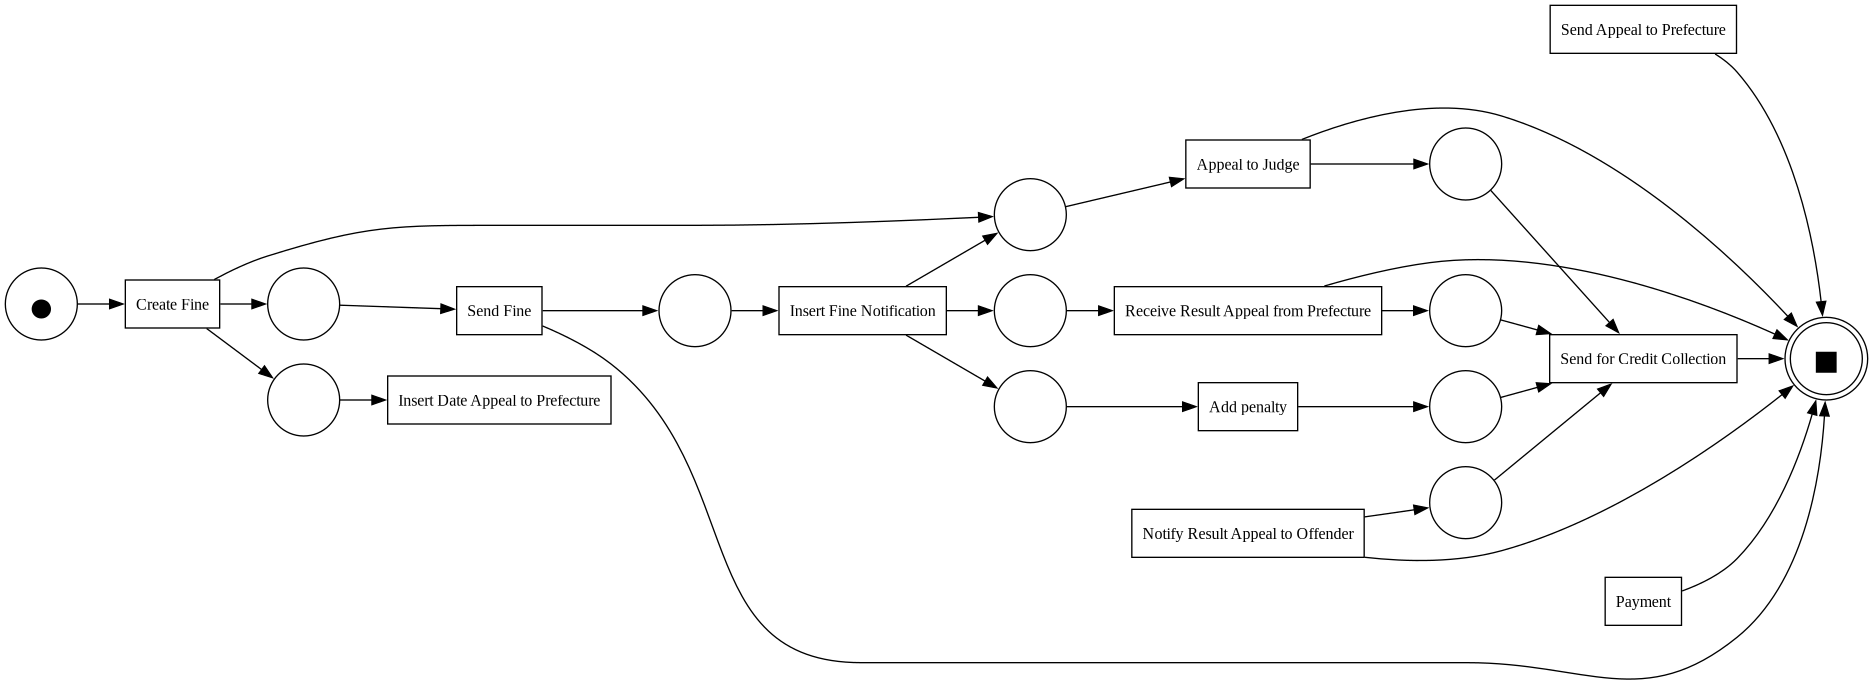

In [5]:
gviz = pn_visualizer.apply(net_alpha, initial_marking_alpha, final_marking_alpha)
pn_visualizer.view(gviz)

Calculate fitness of the algoritm

In [6]:
replay_result_alpha = token_replay.apply(log, net_alpha, initial_marking_alpha, final_marking_alpha)
fitness_alpha = replay_result_alpha[1]

replaying log with TBR, completed traces :: 100%|██████████| 231/231 [00:01<00:00, 116.41it/s]


## Heuristic miner algorithm

In [7]:
heu_net = heuristics_miner.apply_heu(log)

Visualize the model

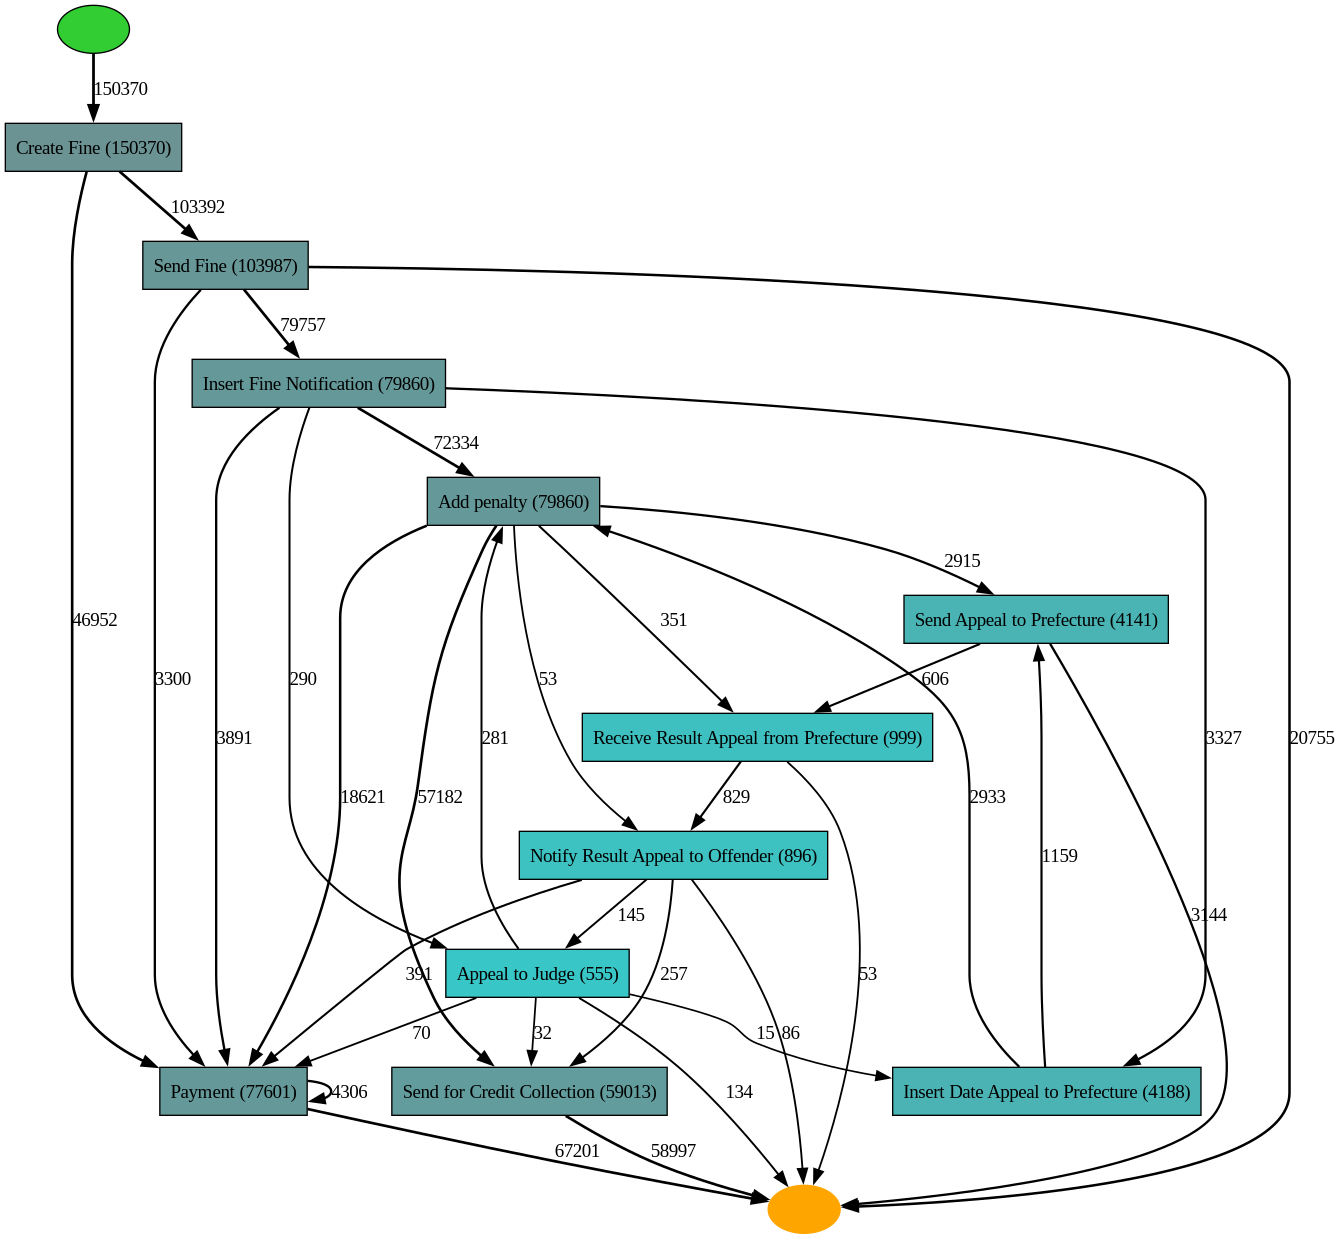

In [8]:
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

Convert heuristics net to petri net

In [9]:
net_heuristic, initial_marking_heuristic, final_marking_heuristic = hn_to_petri_converter.apply(heu_net)

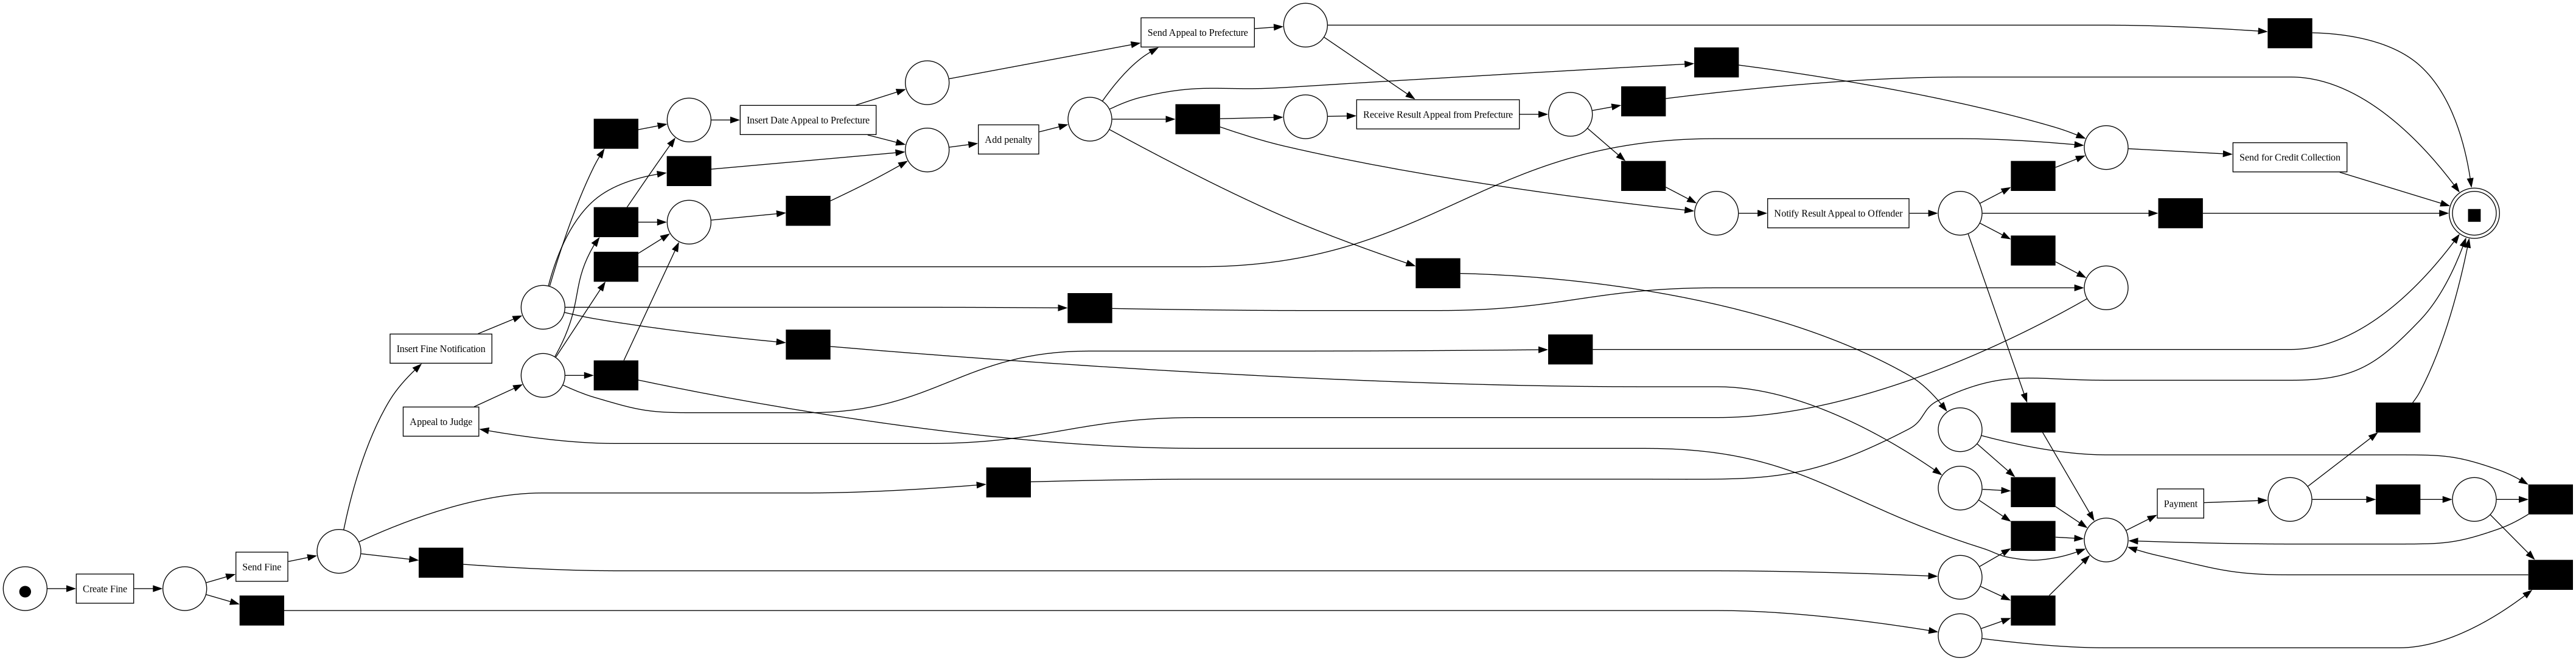

In [10]:
gviz = pn_visualizer.apply(net_heuristic, initial_marking_heuristic, final_marking_heuristic)
pn_visualizer.view(gviz)

Calculate fitness

In [11]:
replay_result_heuristic = token_replay.apply(log, net_heuristic, initial_marking_heuristic, final_marking_heuristic)

replaying log with TBR, completed traces :: 100%|██████████| 231/231 [00:02<00:00, 95.78it/s] 


## Results

Calculate alpha algoritm fitness

In [12]:
fitness_values_alpha = [trace['trace_fitness'] for trace in replay_result_alpha]
average_fitness_alpha = sum(fitness_values_alpha) / len(fitness_values_alpha)
perfectly_fit_traces_alpha = sum(trace['trace_is_fit'] for trace in replay_result_alpha)
percentage_fit_traces_alpha = (perfectly_fit_traces_alpha / len(replay_result_alpha)) * 100

print("Alpha Miner Average Fitness:", average_fitness_alpha)
print("Alpha Miner Percentage of Perfectly Fit Traces:", percentage_fit_traces_alpha)

Alpha Miner Average Fitness: 0.6741431381487306
Alpha Miner Percentage of Perfectly Fit Traces: 0.0


Calculate precision

In [13]:
precision_alpha = precision_evaluator.apply(log, net_alpha, initial_marking_alpha, final_marking_alpha)
print("Alpha Miner Precision:", precision_alpha)

replaying log with TBR, completed traces :: 100%|██████████| 271/271 [00:00<00:00, 2923.72it/s]


Alpha Miner Precision: 0.6623544318535728


Calculate heuristics algorithm fitness

In [14]:
fitness_values_heuristic = [trace['trace_fitness'] for trace in replay_result_heuristic]
average_fitness_heuristic = sum(fitness_values_heuristic) / len(fitness_values_heuristic)
perfectly_fit_traces_heuristic = sum(trace['trace_is_fit'] for trace in replay_result_heuristic)
percentage_fit_traces_heuristic = (perfectly_fit_traces_heuristic / len(replay_result_heuristic)) * 100

print("Heuristic Miner Average Fitness:", average_fitness_heuristic)
print("Heuristic Miner Percentage of Perfectly Fit Traces:", percentage_fit_traces_heuristic)

Heuristic Miner Average Fitness: 0.9186048046734787
Heuristic Miner Percentage of Perfectly Fit Traces: 52.791780275320875


Calculate heuristics algorithm precision

In [15]:
precision_heuristic = precision_evaluator.apply(log, net_heuristic, initial_marking_heuristic, final_marking_heuristic)
print("Heuristic Miner Precision:", precision_heuristic)

computing precision with alignments, completed variants :: 100%|██████████| 271/271 [00:00<00:00, 769.74it/s]


Heuristic Miner Precision: 0.9913566987504848
